<a href="https://colab.research.google.com/github/dinesh875-k/Hand-writtten-digit-recognation/blob/main/project1_on_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))


GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
!pip install numpy matplotlib seaborn


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


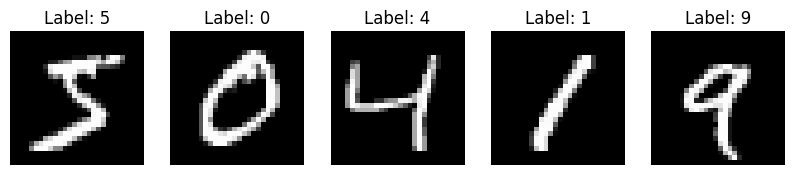

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Display sample images
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].set_title(f"Label: {y_train[i]}")
    axes[i].axis('off')
plt.show()


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9099 - loss: 0.2973 - val_accuracy: 0.9850 - val_loss: 0.0473
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9862 - loss: 0.0448 - val_accuracy: 0.9861 - val_loss: 0.0395
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9905 - loss: 0.0294 - val_accuracy: 0.9909 - val_loss: 0.0278
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9943 - loss: 0.0188 - val_accuracy: 0.9899 - val_loss: 0.0318
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9954 - loss: 0.0143 - val_accuracy: 0.9905 - val_loss: 0.0382
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9956 - loss: 0.0127 - val_accuracy: 0.9908 - val_loss: 0.0347
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9971 - loss: 0.0090 - val_accuracy: 0.9902 - val_loss: 0.0344
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9980 - loss: 0.00

In [ ]:
test_loss, test_acc = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9854 - loss: 0.0694

Test Accuracy: 98.92%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


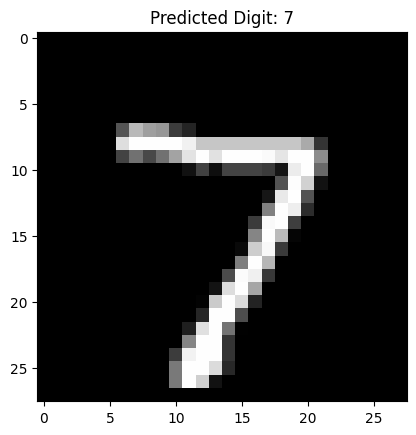

In [ ]:
# @title to make single prediction
import numpy as np

# Predict on a sample
sample = np.expand_dims(x_test[0], axis=0).reshape(-1, 28, 28, 1)
prediction = model.predict(sample)
predicted_digit = np.argmax(prediction)

# Display result
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


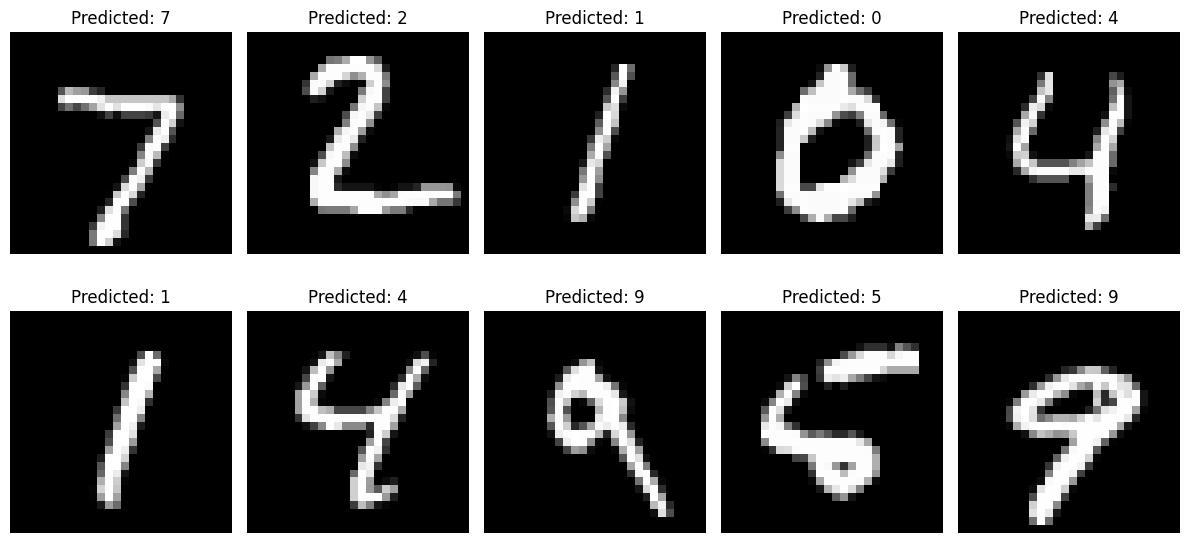

In [ ]:
# @title to make multiple predictions
import numpy as np

# Select multiple test samples
num_samples = 10  # You can change this number
samples = x_test[:num_samples].reshape(-1, 28, 28, 1)

# Get predictions for multiple images
predictions = model.predict(samples)
predicted_digits = np.argmax(predictions, axis=1)

# Display results
fig, axes = plt.subplots(2, 5, figsize=(12, 6))  # Creating a 2x5 grid for images
axes = axes.ravel()  # Flatten the 2D array of axes into 1D

for i in range(num_samples):
    axes[i].imshow(x_test[i], cmap='gray')
    axes[i].set_title(f"Predicted: {predicted_digits[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive

# Save the model
model.save('/content/drive/MyDrive/mnist_digit_recognizer.h5')


Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/mnist_digit_recognizer.h5')
